## Analysis Data from Delivery Platform (Business Analysis)

### _By Angela Vargas

#### Download Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load Data Set

In [13]:
# load dataset
data = pd.read_excel('Sample_Data_Set.xlsx')

In [14]:
data.head(5)

,order_number,courier_id,restaurant_id,courier_shift_id,delivery_date,delivery_placed_time,order_assigned_to_courier_time,order_accepted_by_courier_time,courier_in_transit_to_restaurant_time,courier_arrived_at_restuarant_time,...,courier_in_transit_to_customer_time,courier_arrived_at_customer_time,delivery_expected_completed_time,delivery_completed_time,courier_held_by_customer_sec,courier_held_by_restaurant_sec,distance_courier_assigned_to_restaurant_meters,distance_restaurant_to_customer_meters,courier_assigned_to_restaurant_driving_time_min,restaurant_to_customer_driving_time_min
0,1,1,1,1,2020-11-29,2020-11-29 15:44:44.613,2020-11-29 15:44:45,2020-11-29 15:44:47,2020-11-29 15:44:51,2020-11-29 15:47:11,...,2020-11-29 15:55:36,2020-11-29 15:59:32,2020-11-29 15:56:45.009,2020-11-29 16:00:10.929,-22,182,980,1065,2,3
1,2,2,2,2,2020-11-29,2020-11-29 12:53:04.543,2020-11-29 13:08:33,2020-11-29 13:08:49,2020-11-29 13:08:54,2020-11-29 13:15:17,...,2020-11-29 13:18:28,2020-11-29 13:28:24,2020-11-29 13:25:19.000,2020-11-29 13:29:15.205,-9,126,1502,6528,6,9
2,3,3,3,3,2020-11-29,2020-11-29 20:57:21.131,2020-11-29 20:57:22,2020-11-29 20:57:38,2020-11-29 20:57:48,2020-11-29 21:03:10,...,2020-11-29 21:04:25,2020-11-29 21:07:22,2020-11-29 21:10:21.617,2020-11-29 21:07:59.427,-23,-62,823,1698,5,2
3,4,1,4,1,2020-11-29,2020-11-29 14:32:27.026,2020-11-29 14:32:34,2020-11-29 14:32:39,2020-11-29 14:32:44,2020-11-29 14:34:52,...,2020-11-29 14:51:37,2020-11-29 14:51:41,2020-11-29 14:49:27.472,2020-11-29 14:51:45.302,-56,58,742,7368,1,0
4,5,4,2,4,2020-11-29,2020-11-29 19:12:31.450,2020-11-29 19:24:14,2020-11-29 19:26:21,2020-11-29 19:26:25,2020-11-29 19:29:30,...,2020-11-29 19:30:25,2020-11-29 19:36:34,2020-11-29 19:38:45.000,2020-11-29 19:36:40.995,-54,-200,1170,2691,2,5


In [15]:
data.tail(5)

,order_number,courier_id,restaurant_id,courier_shift_id,delivery_date,delivery_placed_time,order_assigned_to_courier_time,order_accepted_by_courier_time,courier_in_transit_to_restaurant_time,courier_arrived_at_restuarant_time,...,courier_in_transit_to_customer_time,courier_arrived_at_customer_time,delivery_expected_completed_time,delivery_completed_time,courier_held_by_customer_sec,courier_held_by_restaurant_sec,distance_courier_assigned_to_restaurant_meters,distance_restaurant_to_customer_meters,courier_assigned_to_restaurant_driving_time_min,restaurant_to_customer_driving_time_min
12544,12759,81,172,1576,2020-11-27,2020-11-27 17:42:59.818,2020-11-27 18:09:33,2020-11-27 18:09:42,2020-11-27 18:09:48,2020-11-27 18:17:09,...,2020-11-27 18:18:15,2020-11-27 18:28:57,2020-11-27 18:21:01.000,2020-11-27 18:30:00.109,3,-22,4679,6276,6,10
12545,12760,119,127,2916,2020-11-26,2020-11-26 23:48:06.844,2020-11-27 00:20:59,2020-11-27 00:21:03,2020-11-27 00:21:07,2020-11-27 00:31:09,...,2020-11-27 00:33:10,2020-11-27 00:42:47,2020-11-27 00:36:07.000,2020-11-27 00:45:29.529,102,38,7052,6152,9,8
12546,12761,33,19,569,2020-11-26,2020-11-27 00:49:50.167,2020-11-27 00:51:23,2020-11-27 00:52:26,2020-11-27 00:52:30,2020-11-27 00:58:54,...,2020-11-27 01:02:20,2020-11-27 01:09:37,2020-11-27 01:13:50.000,2020-11-27 01:10:37.666,0,-154,6459,4972,6,7
12547,12762,98,1,1523,2020-11-27,2020-11-27 10:44:17.410,2020-11-27 10:44:18,2020-11-27 10:44:20,2020-11-27 10:44:23,2020-11-27 10:51:34,...,2020-11-27 11:00:02,2020-11-27 11:04:17,2020-11-27 11:04:17.737,2020-11-27 11:04:40.425,-37,37,7316,1240,7,4
12548,12763,340,143,1584,2020-11-27,2020-11-27 17:55:44.869,2020-11-27 18:07:17,2020-11-27 18:07:34,2020-11-27 18:07:36,2020-11-27 18:19:52,...,2020-11-27 18:22:52,2020-11-27 18:28:00,2020-11-27 18:11:45.000,2020-11-27 18:30:02.158,62,102,7810,1726,12,5


### Data General Exploration
- Original dataset exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12549 entries, 0 to 12548
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   order_number                                     12549 non-null  int64         
 1   courier_id                                       12549 non-null  int64         
 2   restaurant_id                                    12549 non-null  int64         
 3   courier_shift_id                                 12549 non-null  int64         
 4   delivery_date                                    12549 non-null  datetime64[ns]
 5   delivery_placed_time                             12549 non-null  datetime64[ns]
 6   order_assigned_to_courier_time                   12549 non-null  datetime64[ns]
 7   order_accepted_by_courier_time                   12549 non-null  datetime64[ns]
 8   courier_in_transit_to_restaurant_tim

In [4]:
#datasets statistic description
data.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
order_number,12549.0,6378.079847,1.0,3182.0,6382.0,9564.0,12763.0,3685.384174
courier_id,12549.0,144.854172,1.0,66.0,130.0,210.0,390.0,93.113065
restaurant_id,12549.0,56.343135,1.0,17.0,52.0,83.0,182.0,45.019057
courier_shift_id,12549.0,1321.658778,1.0,635.0,1336.0,1933.0,2916.0,799.585387
delivery_date,12549,2020-11-26 05:11:25.919196672,2020-11-23 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,NaN
delivery_placed_time,12549,2020-11-26 22:04:31.454754304,2020-11-23 07:08:20.302000,2020-11-25 12:12:52.313999872,2020-11-26 22:22:50.700999936,2020-11-28 15:27:29.840999936,2020-11-29 23:50:41.223000,NaN
order_assigned_to_courier_time,12549,2020-11-26 22:11:04.191250432,2020-11-23 07:08:39,2020-11-25 12:18:26,2020-11-26 22:24:55,2020-11-28 15:30:00,2020-11-29 23:50:42,NaN
order_accepted_by_courier_time,12549,2020-11-26 22:13:00.949159424,2020-11-23 07:08:46,2020-11-25 12:18:48,2020-11-26 22:24:57,2020-11-28 15:32:37,2020-11-29 23:50:46,NaN
courier_in_transit_to_restaurant_time,12549,2020-11-26 22:13:07.761684992,2020-11-23 07:08:50,2020-11-25 12:18:56,2020-11-26 22:24:59,2020-11-28 15:32:39,2020-11-29 23:50:54,NaN
courier_arrived_at_restuarant_time,12549,2020-11-26 22:19:14.112628224,2020-11-23 07:17:41,2020-11-25 12:24:47,2020-11-26 22:31:58,2020-11-28 15:39:11,2020-11-29 23:56:17,NaN


In [5]:
# data check missing values of all features
data.isnull().sum()

order_number                                       0
courier_id                                         0
restaurant_id                                      0
courier_shift_id                                   0
delivery_date                                      0
delivery_placed_time                               0
order_assigned_to_courier_time                     0
order_accepted_by_courier_time                     0
courier_in_transit_to_restaurant_time              0
courier_arrived_at_restuarant_time                 0
courier_expected_at_restaurant_time                0
courier_collected_from_restaurant_time             0
courier_in_transit_to_customer_time                0
courier_arrived_at_customer_time                   0
delivery_expected_completed_time                   0
delivery_completed_time                            0
courier_held_by_customer_sec                       0
courier_held_by_restaurant_sec                     0
distance_courier_assigned_to_restaurant_meters

In [6]:
#Checking unique values
data.nunique()

order_number                                       12549
courier_id                                           389
restaurant_id                                        182
courier_shift_id                                    2908
delivery_date                                          7
delivery_placed_time                               12549
order_assigned_to_courier_time                      7957
order_accepted_by_courier_time                     12135
courier_in_transit_to_restaurant_time              12269
courier_arrived_at_restuarant_time                 12316
courier_expected_at_restaurant_time                12385
courier_collected_from_restaurant_time             12283
courier_in_transit_to_customer_time                12299
courier_arrived_at_customer_time                   12298
delivery_expected_completed_time                   12404
delivery_completed_time                            12549
courier_held_by_customer_sec                         537
courier_held_by_restaurant_sec 

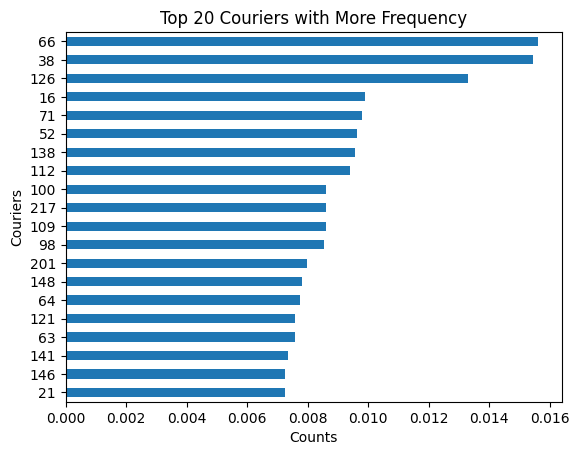

In [ ]:
#Plot the bar grahp of the Top Couriers by percentages
top_couriers = data["courier_id"].value_counts(normalize=True).head(20)
top_couriers.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Couriers with More Frequency')
plt.xlabel('Counts')
plt.ylabel('Couriers ID')
plt.show()

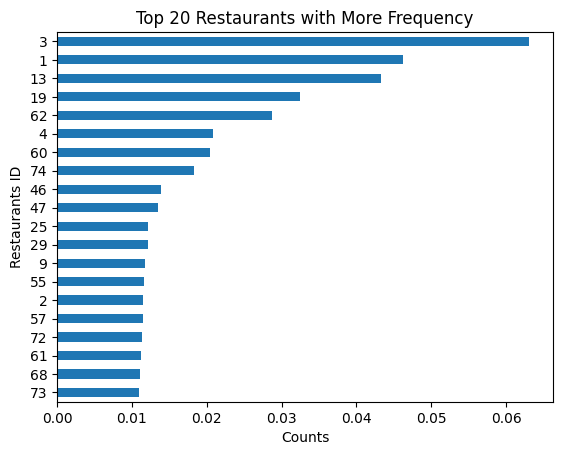

In [9]:
#Plot the bar grahp of the Top Restaurants by percentages
top_restaurant = data["restaurant_id"].value_counts(normalize=True).head(20)
top_restaurant.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Restaurants with More Frequency')
plt.xlabel('Counts')
plt.ylabel('Restaurants ID')
plt.show()

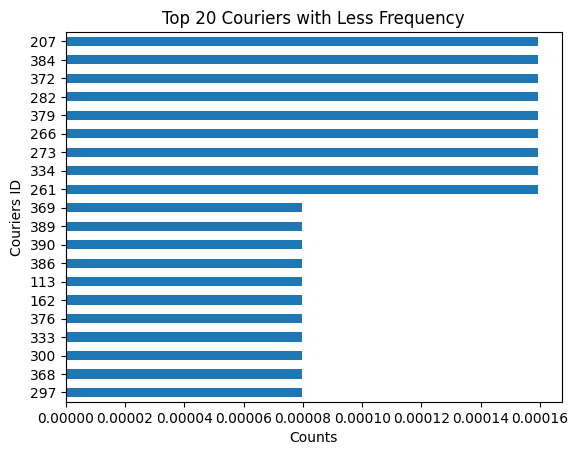

In [10]:
#Plot the bar graph of the Couriers with less percentages
low_couriers = data["courier_id"].value_counts(normalize=True).tail(20)
low_couriers.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Couriers with Less Frequency')
plt.xlabel('Counts')
plt.ylabel('Couriers ID')
plt.show()

### Data Statistic Exploration

In [16]:
#Checking dataset statistics to validate outliers
data.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
order_number,12549.0,6378.079847,1.0,3182.0,6382.0,9564.0,12763.0,3685.384174
courier_id,12549.0,144.854172,1.0,66.0,130.0,210.0,390.0,93.113065
restaurant_id,12549.0,56.343135,1.0,17.0,52.0,83.0,182.0,45.019057
courier_shift_id,12549.0,1321.658778,1.0,635.0,1336.0,1933.0,2916.0,799.585387
delivery_date,12549,2020-11-26 05:11:25.919196672,2020-11-23 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,NaN
delivery_placed_time,12549,2020-11-26 22:04:31.454754304,2020-11-23 07:08:20.302000,2020-11-25 12:12:52.313999872,2020-11-26 22:22:50.700999936,2020-11-28 15:27:29.840999936,2020-11-29 23:50:41.223000,NaN
order_assigned_to_courier_time,12549,2020-11-26 22:11:04.191250432,2020-11-23 07:08:39,2020-11-25 12:18:26,2020-11-26 22:24:55,2020-11-28 15:30:00,2020-11-29 23:50:42,NaN
order_accepted_by_courier_time,12549,2020-11-26 22:13:00.949159424,2020-11-23 07:08:46,2020-11-25 12:18:48,2020-11-26 22:24:57,2020-11-28 15:32:37,2020-11-29 23:50:46,NaN
courier_in_transit_to_restaurant_time,12549,2020-11-26 22:13:07.761684992,2020-11-23 07:08:50,2020-11-25 12:18:56,2020-11-26 22:24:59,2020-11-28 15:32:39,2020-11-29 23:50:54,NaN
courier_arrived_at_restuarant_time,12549,2020-11-26 22:19:14.112628224,2020-11-23 07:17:41,2020-11-25 12:24:47,2020-11-26 22:31:58,2020-11-28 15:39:11,2020-11-29 23:56:17,NaN


Outliers Plot

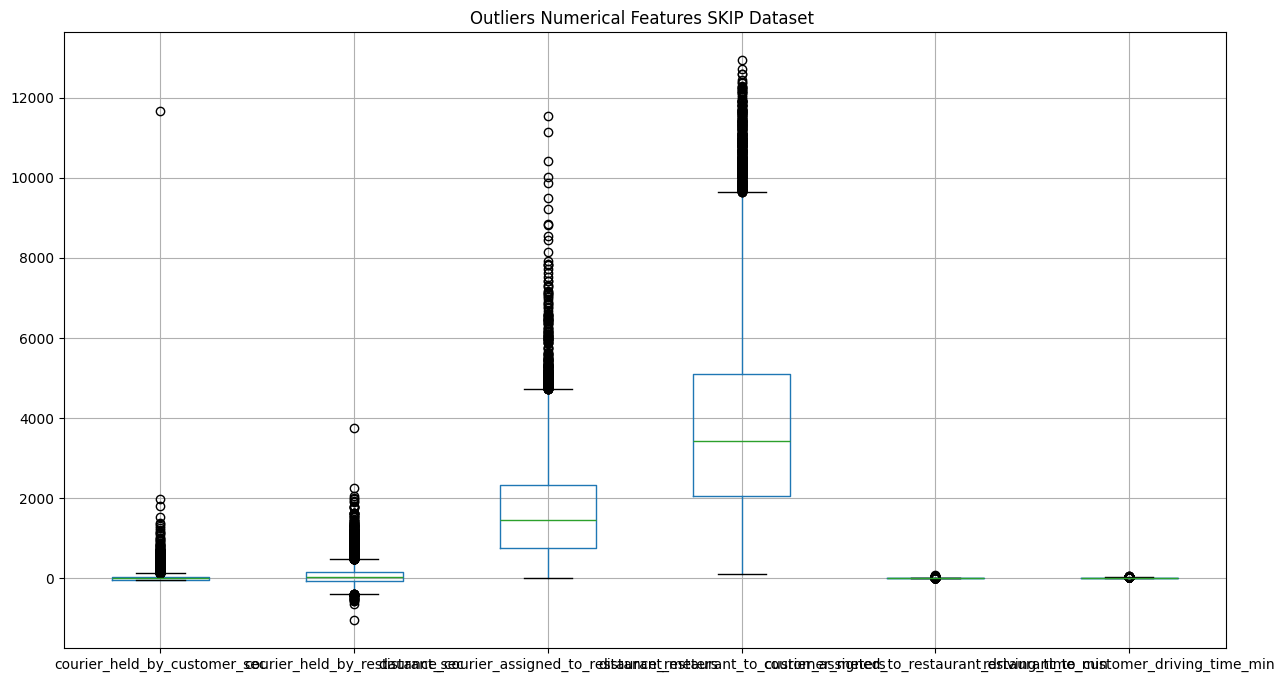

In [20]:
# Check outliers of all numerical features dataset
%matplotlib inline
data.boxplot(column=['courier_held_by_customer_sec','courier_held_by_restaurant_sec','distance_courier_assigned_to_restaurant_meters','distance_restaurant_to_customer_meters',
                     'courier_assigned_to_restaurant_driving_time_min','restaurant_to_customer_driving_time_min'],
                return_type='axes',figsize=(15,8))
plt.title("Outliers Numerical Features SKIP Dataset ")
plt.show()

C:\Users\apvar\AppData\Local\Temp\ipykernel_3900\479494803.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))


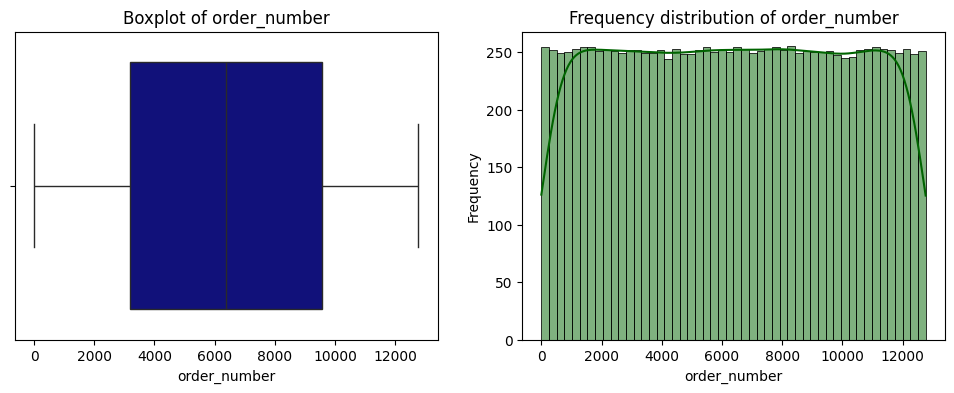

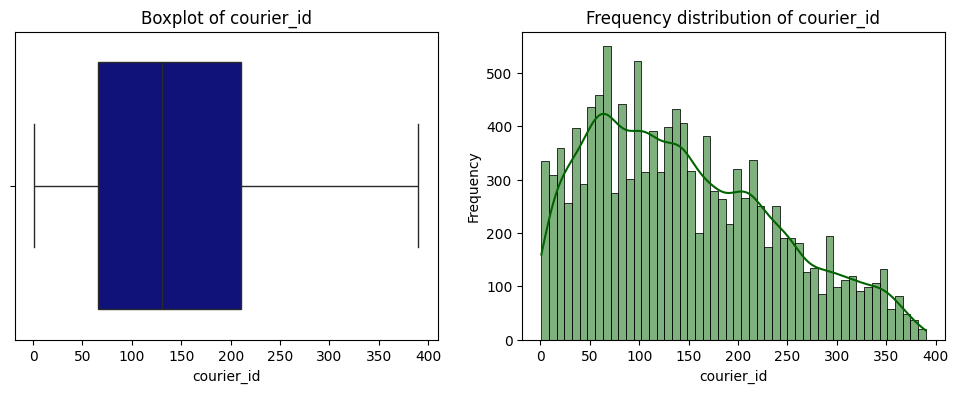

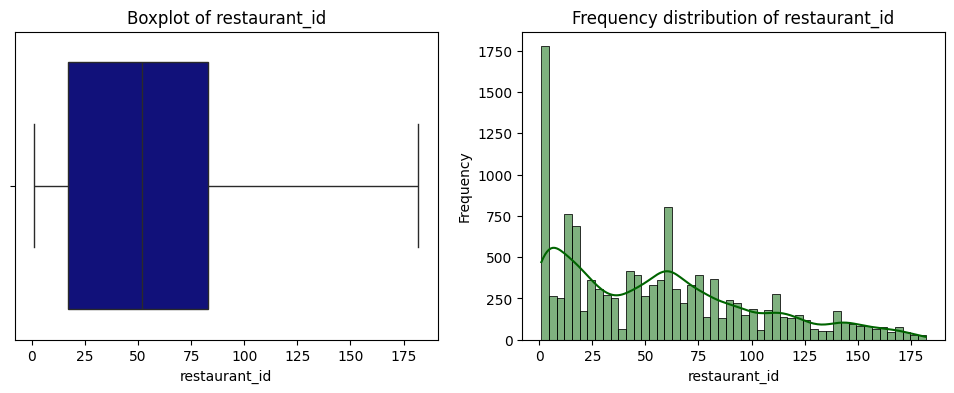

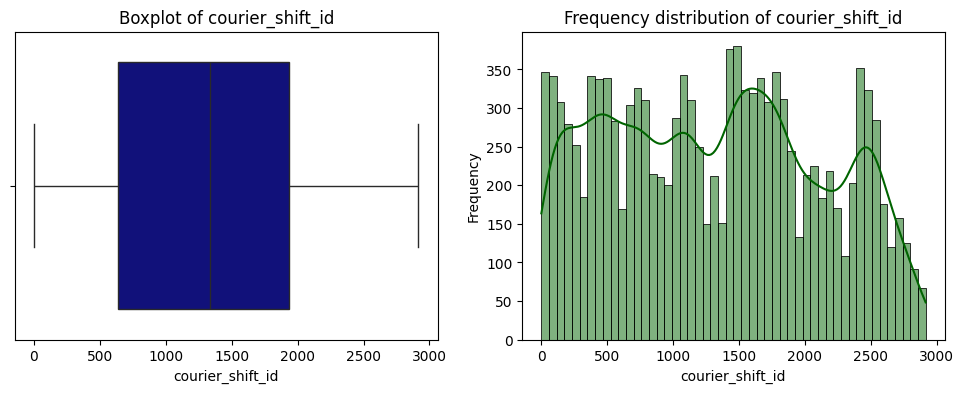

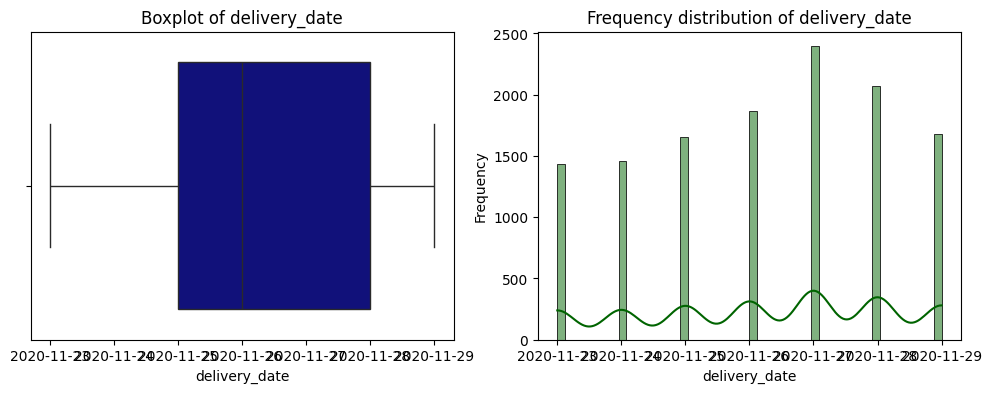

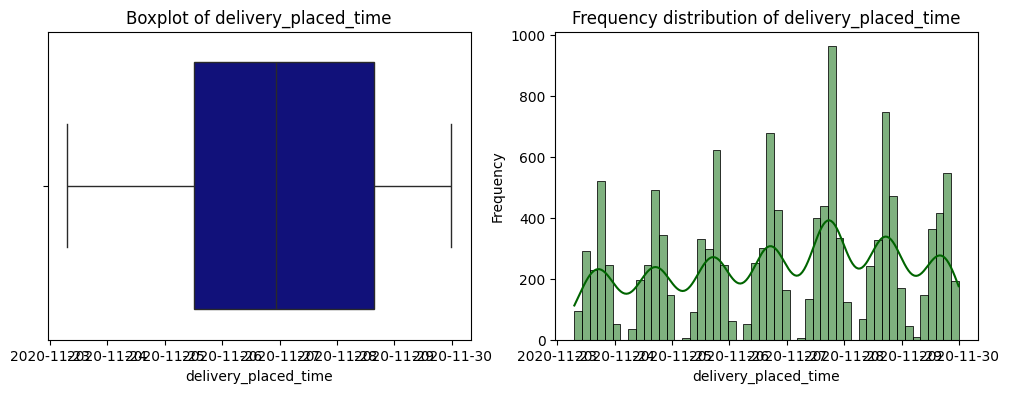

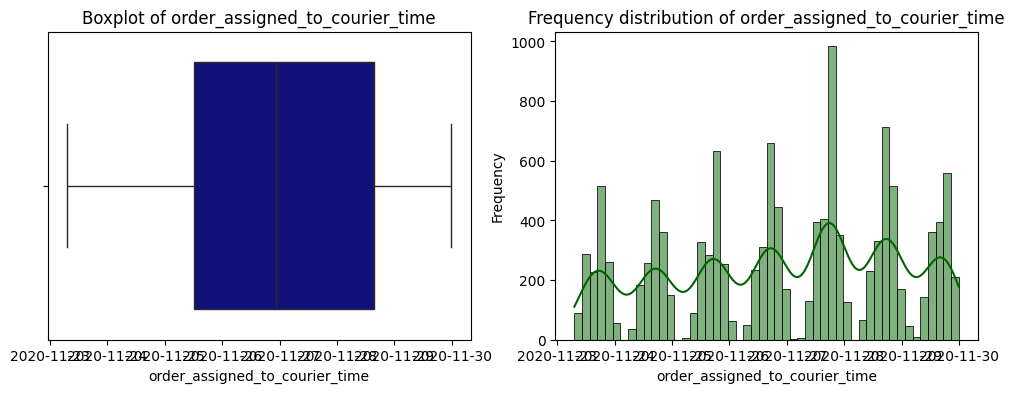

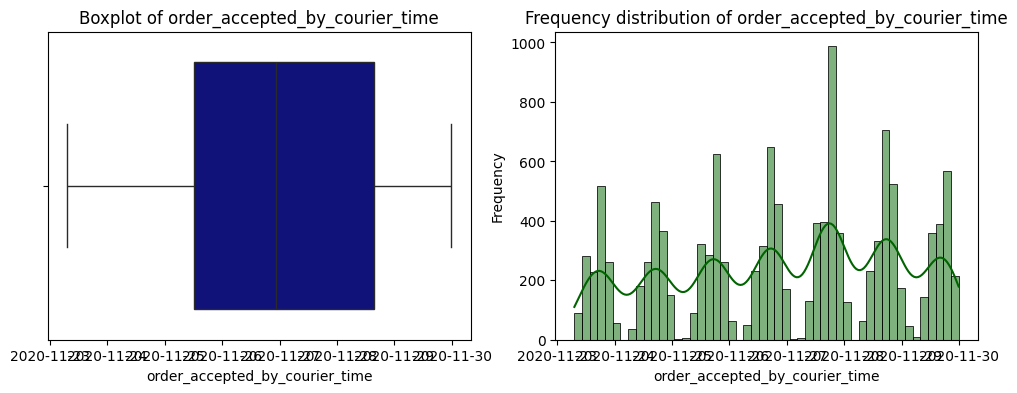

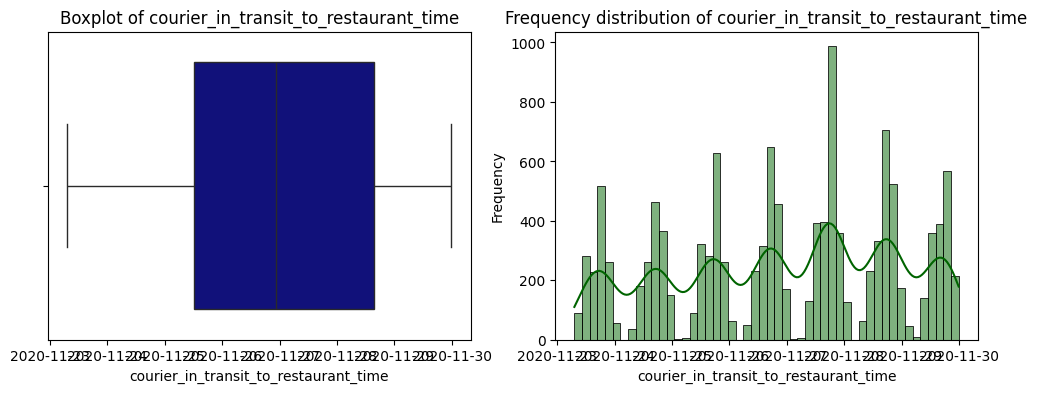

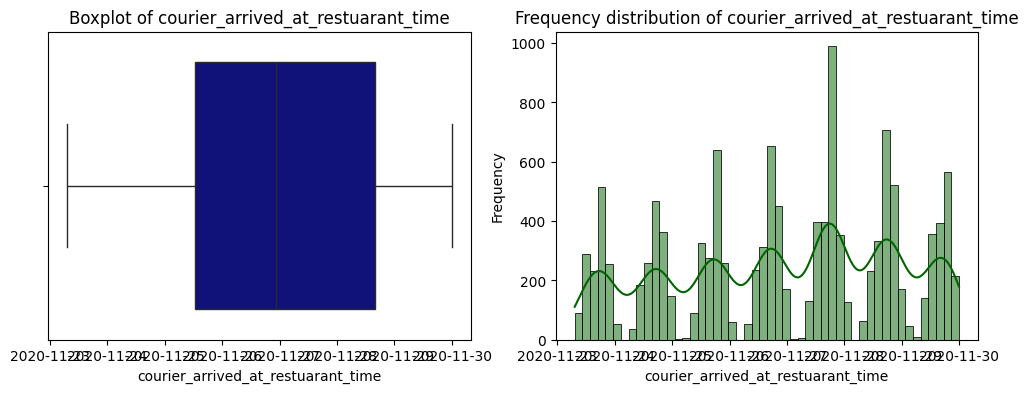

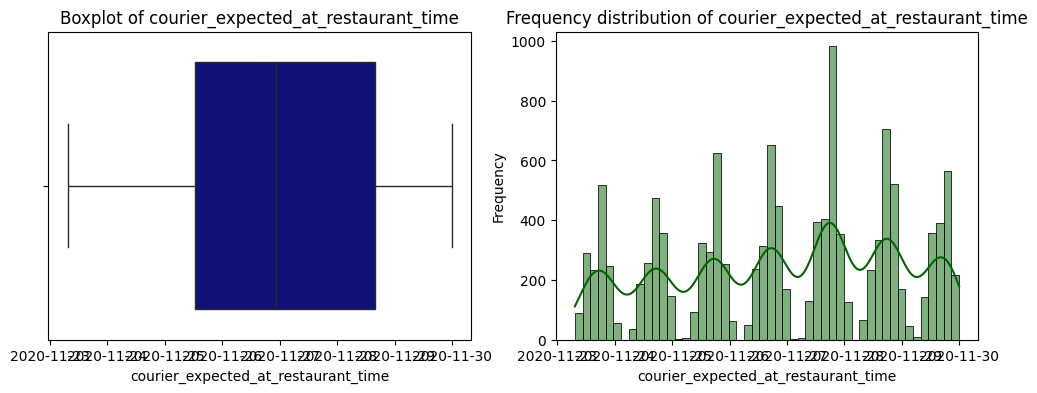

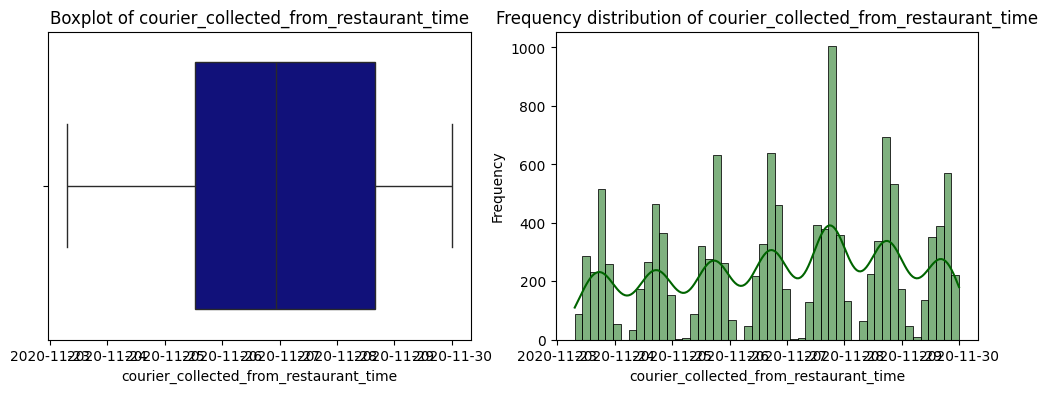

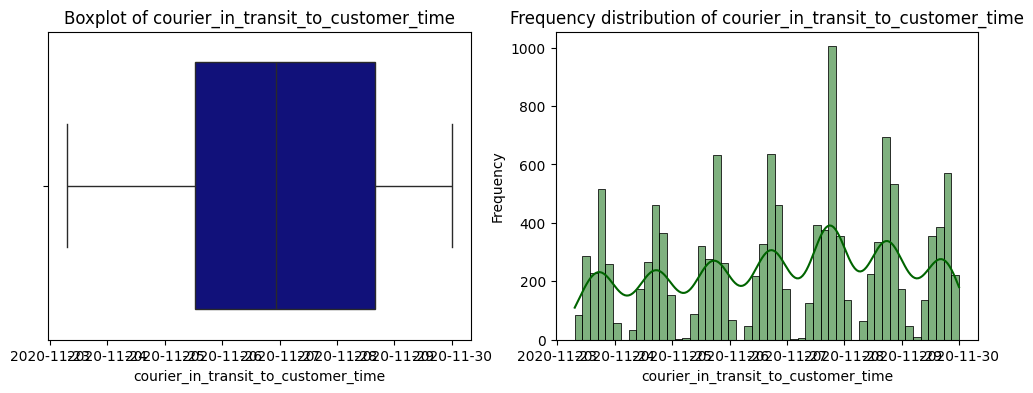

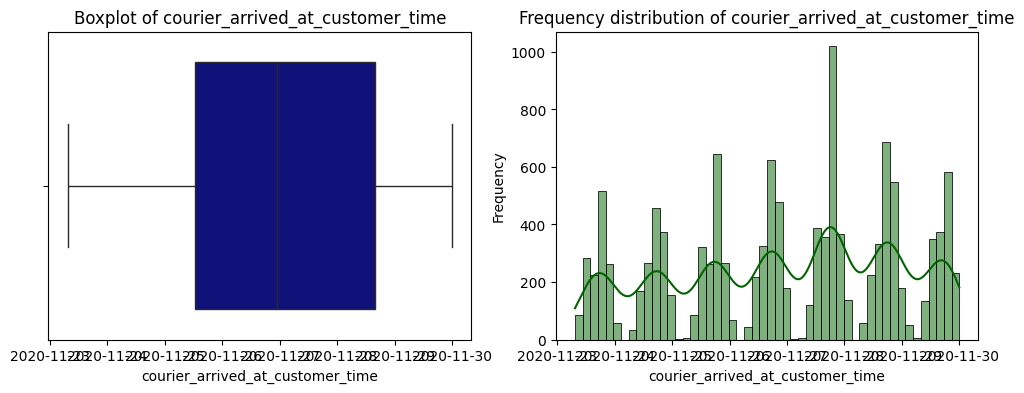

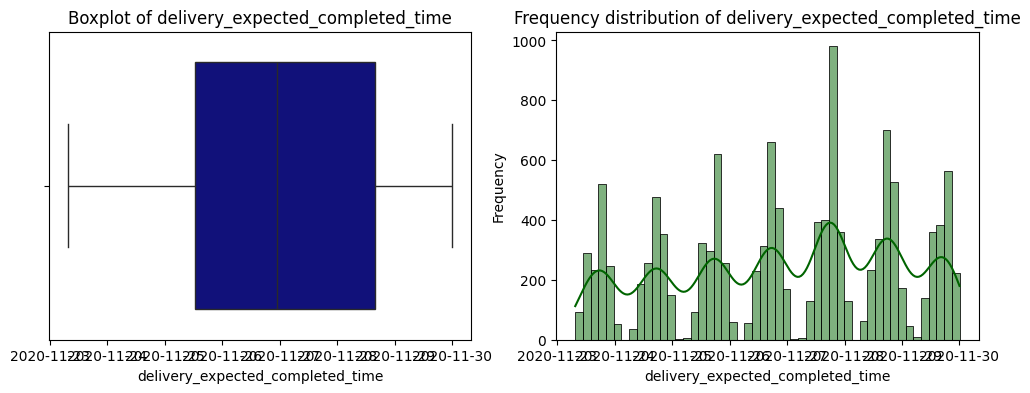

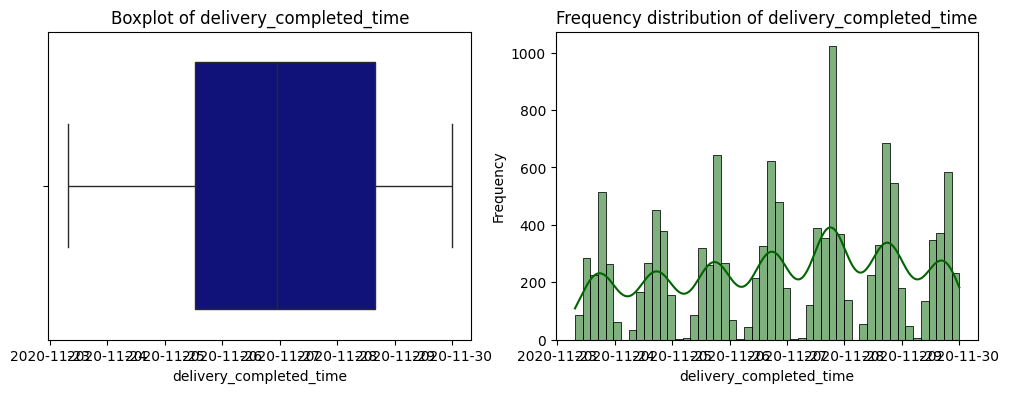

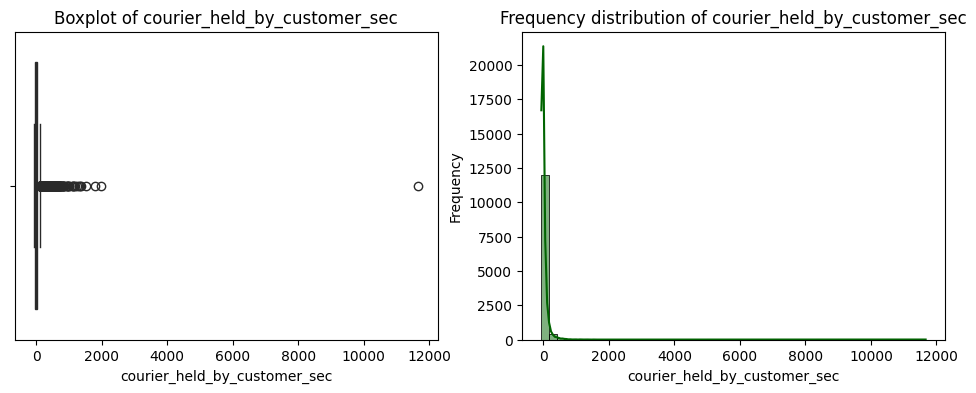

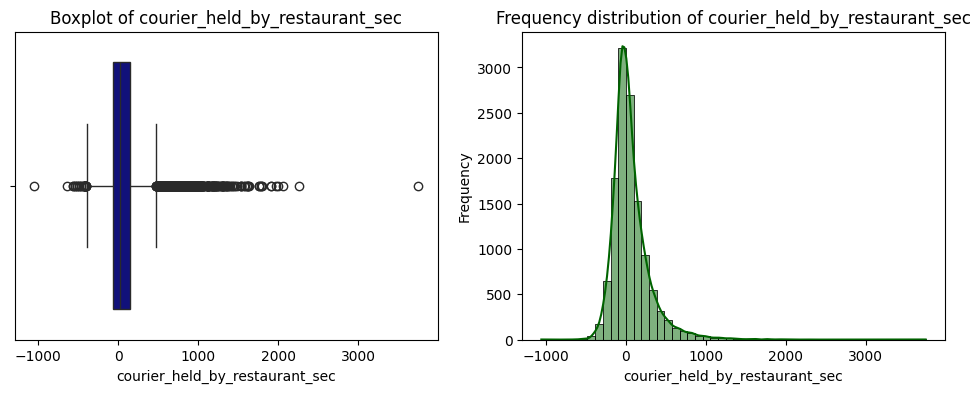

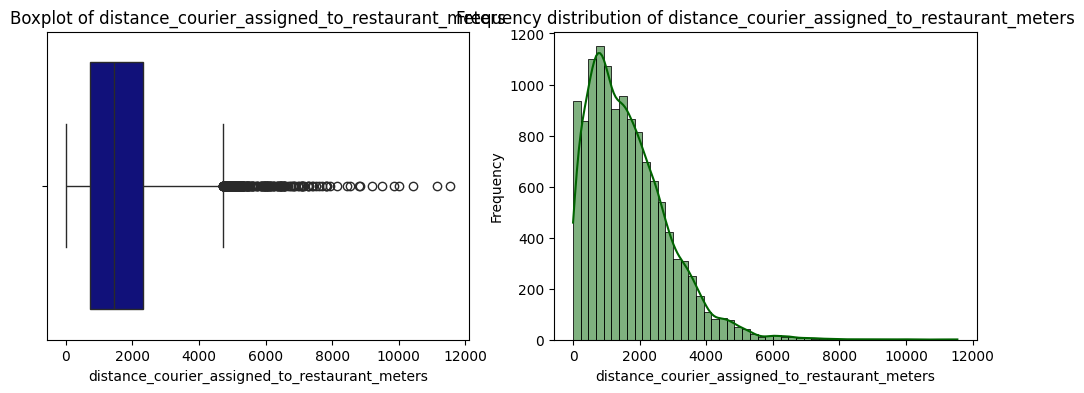

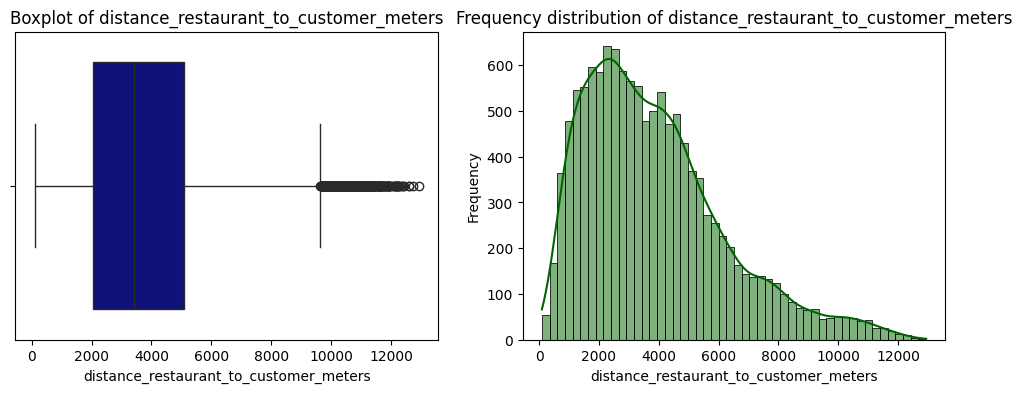

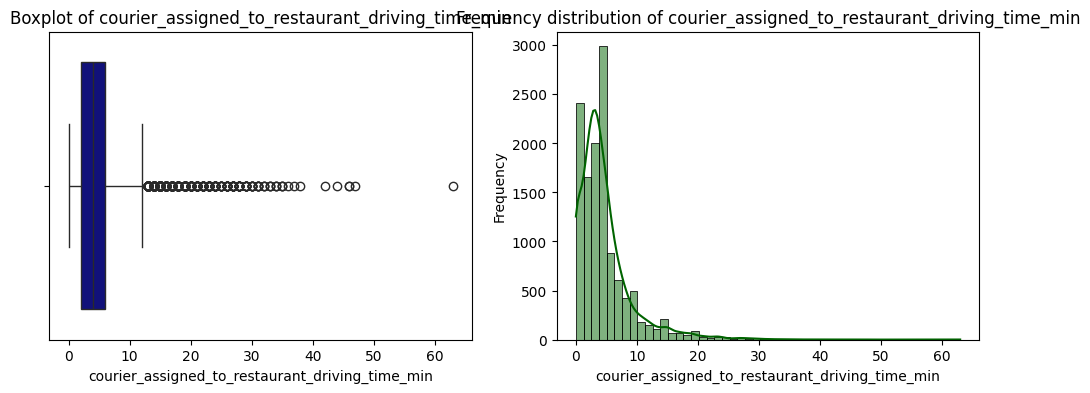

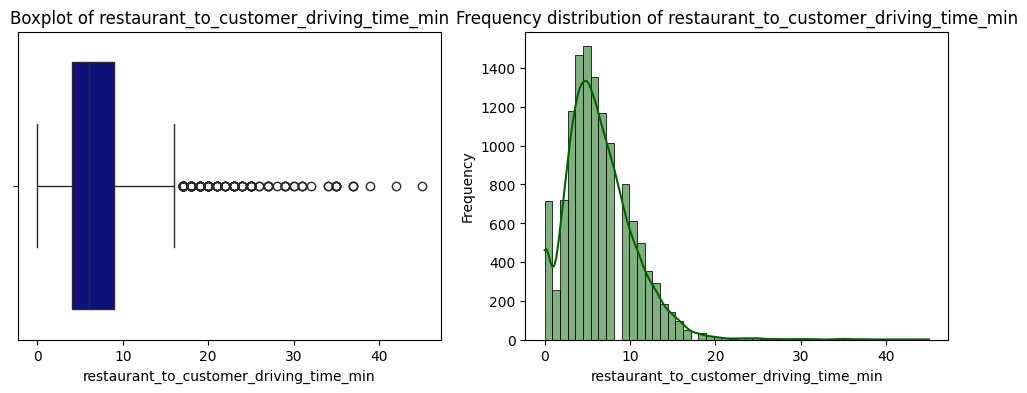

In [24]:
# Checking for outliers individually

for column in data.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.boxplot(data[column], orient='h', color='darkblue', ax=ax1)
    ax1.set_xlabel(f'{column}')
    ax1.set_title(f'Boxplot of {column}')

    sns.histplot(data[column], bins=50, color='darkgreen', kde=True, ax=ax2)
    ax2.set_xlabel(f'{column}')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Frequency distribution of {column}')

###### Note. the ouliers will not be removed due to the nature of the data, these are Weather conditions - observations and calculations which do not have standard patterns through the time.

Distribution Plots - Correlation Analysis

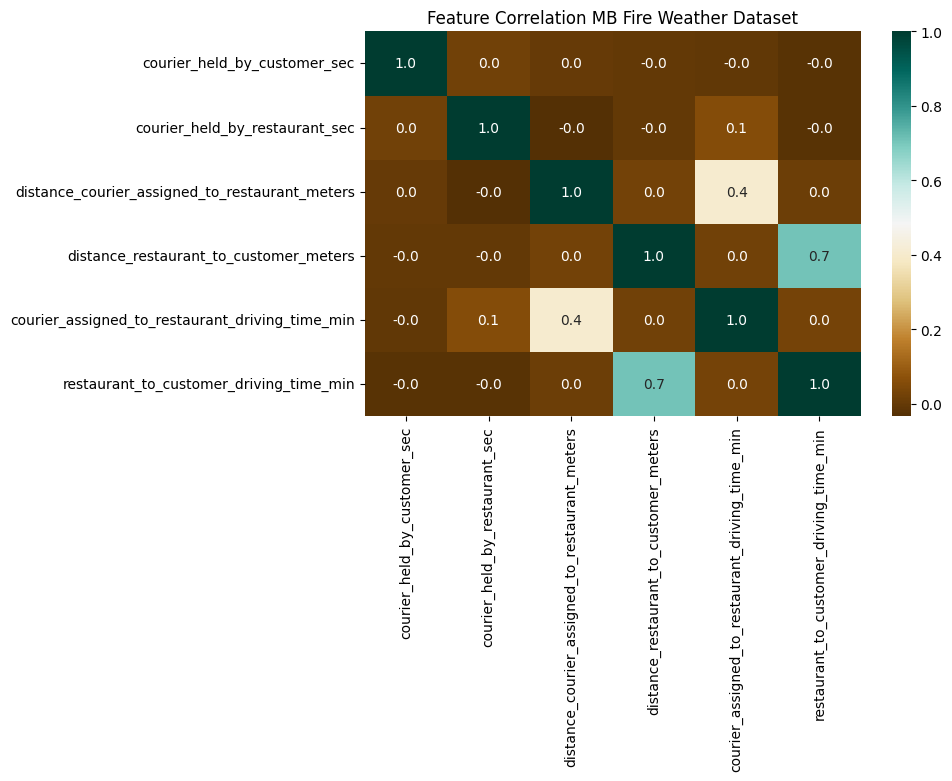

In [25]:
#Checking correlation of features
corr_matrix = data[['courier_held_by_customer_sec','courier_held_by_restaurant_sec','distance_courier_assigned_to_restaurant_meters','distance_restaurant_to_customer_meters',
                     'courier_assigned_to_restaurant_driving_time_min','restaurant_to_customer_driving_time_min']].corr()
fig, ax = plt.subplots(figsize=(8, 5))
# feature correlations heatmap
sns.heatmap(corr_matrix, annot=True, cmap ='BrBG',fmt='.1f')
plt.title('Feature Correlation MB Fire Weather Dataset')
plt.show()

DSR Frequency Distribution by Severity Range

In [28]:
# Converting the DataFrame into Series or one dimensional
Series = data['courier_id']

#Defining bins for Courier ID depending on ranges 
bins = [0, 50, 100, 150, 200, 250, 300, data['courier_id'].max()]

# adding a new column to the DataFrame representing time categories
categories = pd.cut(Series, bins, include_lowest = True, right=False)

# Create the frequency table for Courier ID
frequency_table= pd.Series(categories).value_counts().sort_index()

# #Calculation of relative frequency
relative_frequency = frequency_table/ len(categories)

# #combining frequency and relative frequency in a new DataFrame
frq_distribution = pd.DataFrame({'Frequency': frequency_table, "Relative Frequency": relative_frequency})
print("\nFrequency Table:")
print(frq_distribution)


Frequency Table:
            Frequency  Relative Frequency
courier_id                               
[0, 50)          1976            0.157463
[50, 100)        2727            0.217308
[100, 150)       2565            0.204399
[150, 200)       1737            0.138417
[200, 250)       1630            0.129891
[250, 300)        939            0.074827
[300, 390)        974            0.077616


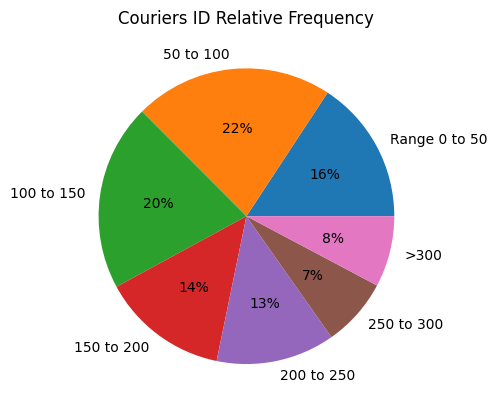

In [31]:
# Distributions of the Couriers data
plt.pie (relative_frequency, labels=['Range 0 to 50','50 to 100','100 to 150','150 to 200','200 to 250','250 to 300','>300'], autopct='%1.0f%%')
plt.title('Couriers ID Relative Frequency')
plt.show()

Data Distribution Continuous Weather Features with Target

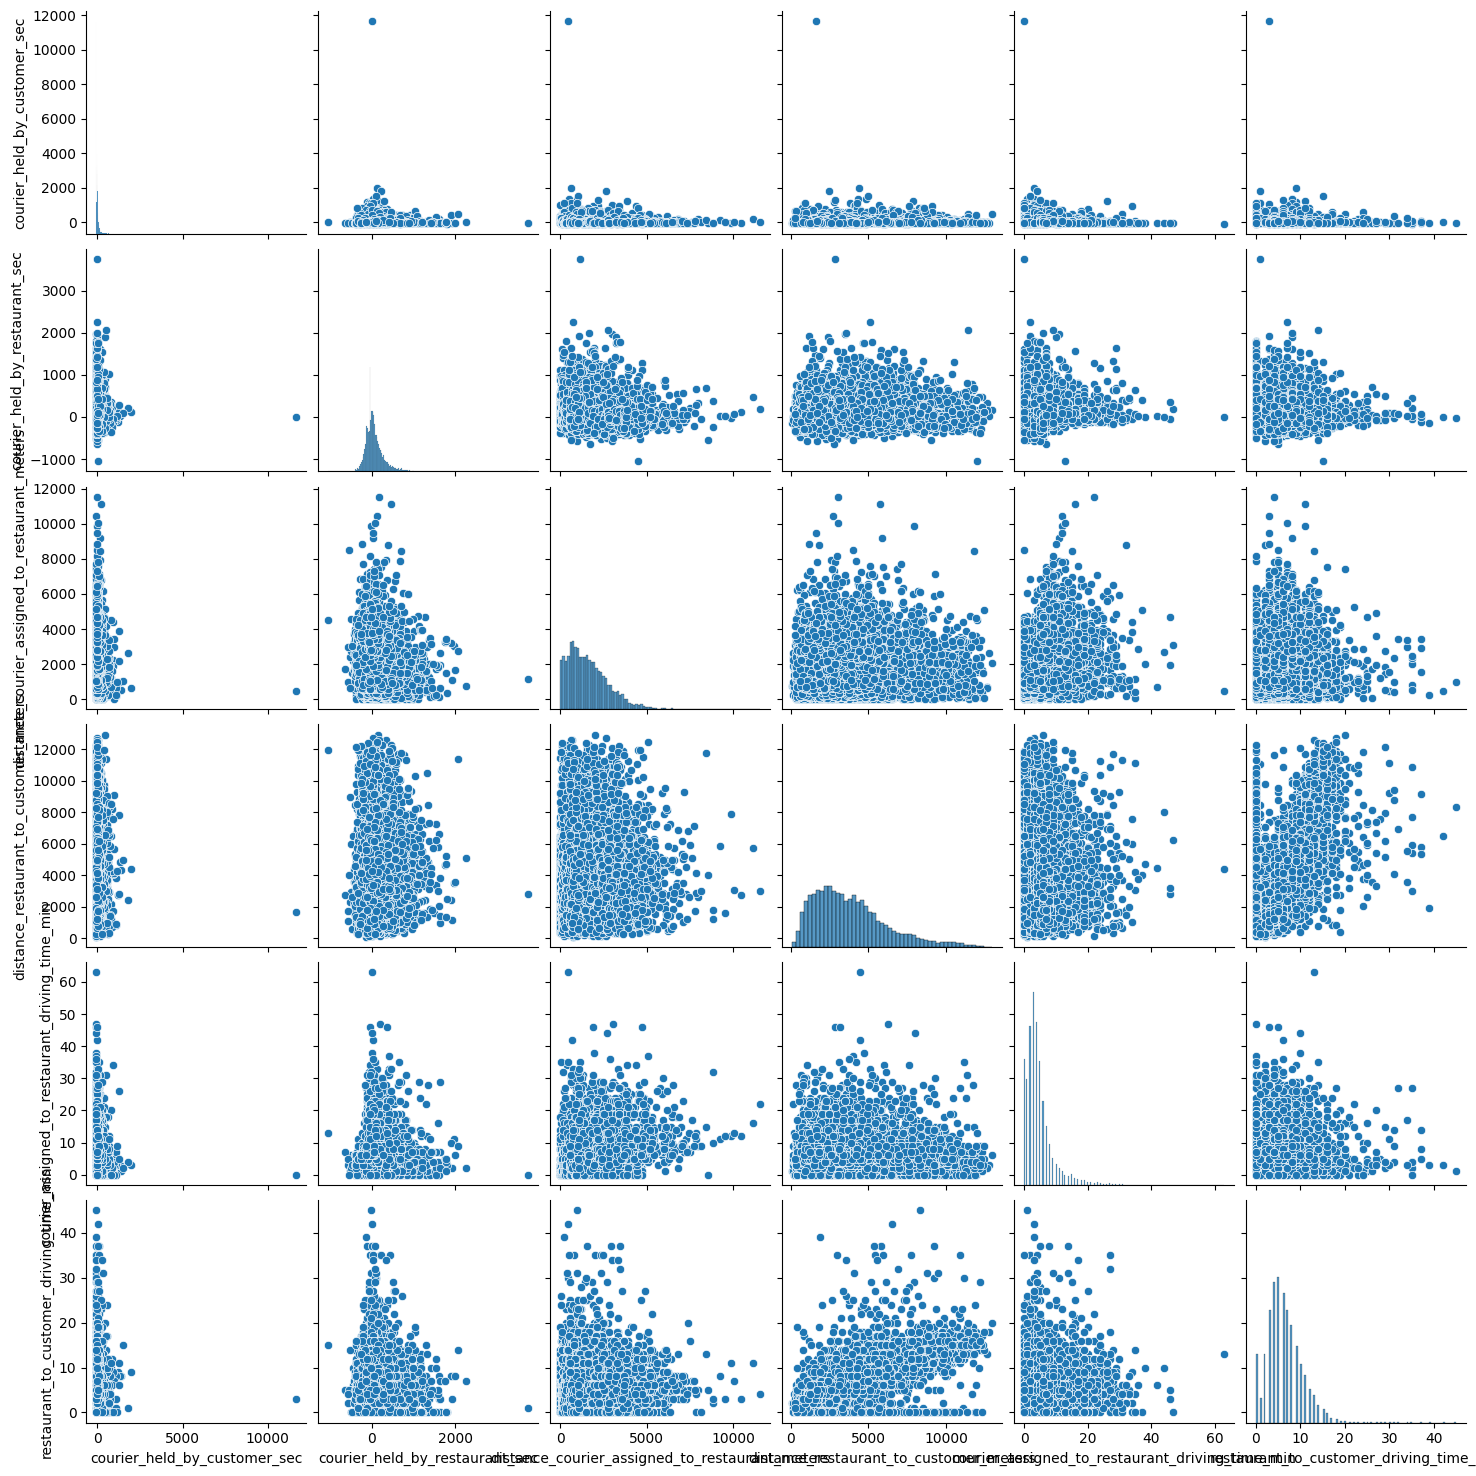

In [ ]:
#Correlation distribution numerical features
sns.pairplot(data = data, vars=['courier_held_by_customer_sec','courier_held_by_restaurant_sec','distance_courier_assigned_to_restaurant_meters','distance_restaurant_to_customer_meters',
                     'courier_assigned_to_restaurant_driving_time_min','restaurant_to_customer_driving_time_min']) 
plt.show()

Data Distribution by Date

In [33]:
# #Number weather observations over time per year
# years = data['Date'].dt.year
# # Count the occurrences of each year and sort by year
# year_counts = years.value_counts().sort_index()

# # Define the colors
# colormap = plt.colormaps.get_cmap('viridis')

# # Assign a different color to each bar
# colors = [colormap(i / len(year_counts)) for i in range(len(year_counts))]

# # Plot the bar graph
# plt.figure()
# ax = year_counts.plot.bar(color=colors[:len(year_counts)])
# # Add labels on the bars
# for i, count in enumerate(year_counts):
#     ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

# plt.title('Observations by Year from 2015 to 2024')
# plt.xlabel('Year')
# plt.ylabel('Counts')
# plt.show()

In [34]:
# #Number observations over time per Month

# # Extract the month from the 'Date' column
# mb_data['Month'] = mb_data['Date'].dt.month

# # Count the occurrences of each month
# month_counts = mb_data['Month'].value_counts().sort_index()
# # Define the month labels in order
# month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# # Plot the bar graph
# plt.figure()
# ax = month_counts.plot(kind='bar', color='skyblue')
# ax.set_xticklabels(month_labels, rotation=0)

# # Add labels on the bars
# for i, count in enumerate(month_counts):
#     ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

# plt.title('Observations by Month From March 2015 to July 2024')
# plt.xlabel('Month')
# plt.ylabel('Counts')
# plt.xticks(rotation=0)  #month labels are horizontal
# plt.show()